###  Reconocimiento de Patrones y Aprendizaje Automatizado
#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
### Proyecto: Hongos Venenosos y Comestibles
#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#### Integrantes: 
#### Úrsula Vanessa Sánchez Rodríguez
#### Adame Serrano Eduardo.

#### Inspiración
* ¿Qué tipos de modelos de aprendizaje automático funcionan mejor en este conjunto de datos?

* ¿Qué características son más indicativas de un hongo venenoso?

#### Librerías

Importamos las librerías

In [3]:
import pandas as pd
import numpy as np
from tabulate import tabulate
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from keras.wrappers.scikit_learn import KerasClassifier

Cargamos el archivo 

In [10]:
%%time
data = pd.read_csv('mushrooms.csv')
data

CPU times: total: 15.6 ms
Wall time: 78.5 ms


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


### Análisis exploratorio.

1. Identificamos las variables que contiene el dataset 

* Información de atributos: (clases = class: comestible = e, venenoso = p)

* Forma de la tapa: campana = b, cónico = c, convexo = x, plano = f, perilla = k, hundido = s

* Cap-surface: fibroso = F, ranuras = g, escamosas = y, lisas = s

* Cap-color: marrón = N, Buff = B, Canela = C, Gris = G, Verde = R, Rosa = P, Púrpura = U, Rojo = E, Blanco = W, Amarillo = Y

* Moretones: moretones = t, no = f

* Olor: almendra = a, anís = L, creosota = C, pescado = y, foul = f, mohoso = m, ninguno = N, picante = P, picante = S

* Gill-attachment = Fijación branquial: attached=a,descending=d,free=f,notched=n

* Gill-spacing= Espaciado branquial: close = c, crowded = w, distante = d

* Gill-size = tamaño de branquias: ancho = b, estrecho = n

* Gill-color = color de branquias: negro = k, marrón = N, buff = B, chocolate = H, gris = G, verde = R, naranja = O, rosa = p, púrpura = U, rojo = E, blanco = W, amarillo = Y

* Forma del tallo: agrandando = e, tapering = t

* Raíz-tallo: bulboso = b, club = c, copa = u, igual = e, rizomorfos = z, rooted = r, falta =?

* Superficie del tallo-por encima del anillo: fibroso = F, escamoso = y, sedoso = K, liso = S

* Superficie del tallo-debajo del anillo: fibroso = F, escamoso = y, sedoso = K, liso = S

* Tallo-color-encima-del-anillo: marrón=N,Buff=B,Canela=C,Gray=G,Orange=O,Pink=P,Red=E,White=W,Yellow=Y

* Tallo-color-debajo-anillo: marrón=N,Buff=B,Canela=C,Gray=G,Orange=O,Pink=P,Red=E,White=W,Yellow=Y

* Tipo de velo: parcial = p, universal = u

* Color del velo: marrón = n, naranja = o, blanco = w, amarillo = y

* Número de anillo: none=n,one=o,two=t

* Tipo de anillo: telaraña = c, evanescente = e, flameación = f, grande = l, ninguno = n, colgante = p, revestimiento = s, zona = z

* Spore-print-color: negro = k, marrón = n, buff = b, chocolate = h, verde = r, naranja = o, púrpura = u, blanco = w, amarillo = y

* Población: abundante=a,agrupada=c,numerosa=n,dispersa=s,varias=v,solitaria=y

* Hábitat: pastos = g, hojas = L, prados = m, caminos = p, urbano = U, desperdicio = W, bosques = D

Como podemos ver, en todo el conjunto de datos se tienen únicamente variables categóricas, por lo que no será necesario una normalización o estandarización de características numéricas (dado que no hay).

2. Identificación datos nulos.

In [11]:
 # Calcula la cantidad de valores nulos por columna
nulos_por_columna = data.isna().sum()

# Crea un DataFrame con los resultados
tabla_nulos = pd.DataFrame(nulos_por_columna, columns=['Valores Nulos'])

# Convierte la tabla de valores nulos en una tabla formateada
tabla_formateada = tabulate(tabla_nulos, headers='keys', tablefmt='fancy_grid')

# Imprime la tabla formateada
print(tabla_formateada)


╒══════════════════════════╤═════════════════╕
│                          │   Valores Nulos │
╞══════════════════════════╪═════════════════╡
│ class                    │               0 │
├──────────────────────────┼─────────────────┤
│ cap-shape                │               0 │
├──────────────────────────┼─────────────────┤
│ cap-surface              │               0 │
├──────────────────────────┼─────────────────┤
│ cap-color                │               0 │
├──────────────────────────┼─────────────────┤
│ bruises                  │               0 │
├──────────────────────────┼─────────────────┤
│ odor                     │               0 │
├──────────────────────────┼─────────────────┤
│ gill-attachment          │               0 │
├──────────────────────────┼─────────────────┤
│ gill-spacing             │               0 │
├──────────────────────────┼─────────────────┤
│ gill-size                │               0 │
├──────────────────────────┼─────────────────┤
│ gill-color 

Lo anterior nos indicaría que ninguna de las características presenta registros nulos, por lo tanto no es necesario dar tratamiento de valores faltantes.

Seguido de esto, ahora observemos una tabla de frecuencias de los datos así como de las categorías y registros que hay.

3. Distribución y frecuencias de los datos.

In [12]:
# Calcula la descripción estadística y transpón el resultado
descripcion = data.describe().T

# Cambia los nombres de las columnas para una mejor presentación
descripcion.rename(columns={'count': 'Conteo', 'unique': 'Clases', 'top': 'Más frecuente', 'freq': 'Frequencia'}, inplace=True)

# Convierte la descripción en una tabla formateada
tabla = tabulate(descripcion, headers=descripcion.columns, tablefmt='fancy_grid', floatfmt=".0f")

# Imprime la tabla formateada
print(tabla)

╒══════════════════════════╤══════════╤══════════╤═════════════════╤══════════════╕
│                          │   Conteo │   Clases │ Más frecuente   │   Frequencia │
╞══════════════════════════╪══════════╪══════════╪═════════════════╪══════════════╡
│ class                    │     8124 │        2 │ e               │         4208 │
├──────────────────────────┼──────────┼──────────┼─────────────────┼──────────────┤
│ cap-shape                │     8124 │        6 │ x               │         3656 │
├──────────────────────────┼──────────┼──────────┼─────────────────┼──────────────┤
│ cap-surface              │     8124 │        4 │ y               │         3244 │
├──────────────────────────┼──────────┼──────────┼─────────────────┼──────────────┤
│ cap-color                │     8124 │       10 │ n               │         2284 │
├──────────────────────────┼──────────┼──────────┼─────────────────┼──────────────┤
│ bruises                  │     8124 │        2 │ f               │        

A manera de representar la información más visual, se da a continuación una gráfica de barras para las frecuencias de las características en el dataset.

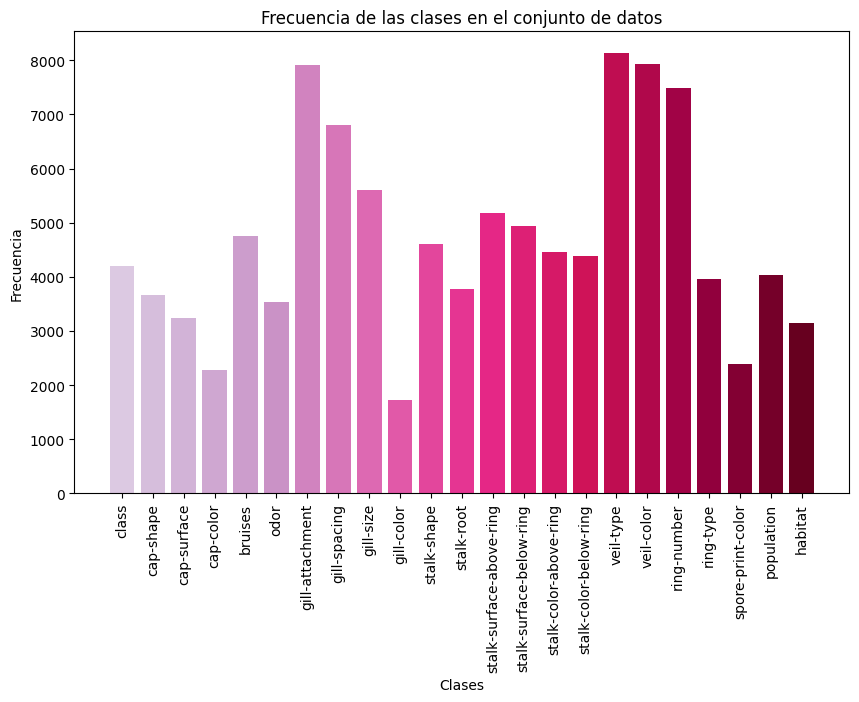

In [13]:
# Datos de entrada
classes = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment',
           'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
           'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type',
           'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']
frequencies = [4208, 3656, 3244, 2284, 4748, 3528, 7914, 6812, 5612, 1728, 4608, 3776, 5176, 4936,
               4464, 4384, 8124, 7924, 7488, 3968, 2388, 4040, 3148]

# Crear degradado de color púrpura
color = plt.cm.get_cmap('PuRd')
colors = color(np.linspace(0.2, 1, len(classes)))

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(classes, frequencies, color=colors)

# Etiquetas y título
plt.xlabel('Clases')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de las clases en el conjunto de datos')

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=90)

# Mostrar gráfico
plt.show()


De lo anterior, podemos observar que unas de las características con mayor frecuencia son: 

* gill-attachment 
* gill-spacing
* veil-type
* veil-color
* ring-number

Una vez realizado el análisis anterior, lo siguiente que haremos es el prepocesamiento de los datos

En este caso, debemos codificar las variables categóricas en variables numéricas utilizando la técnica de codificación one-hot. También separaremos las características de las etiquetas

#### 2. Prepocesamiento de los datos

#### One Hot Encoding

In [14]:
# Obtener las variables categóricas
categorical_features = data.columns

# Aplicar one-hot encoding a todas las variables categóricas
df_encoded = pd.get_dummies(data, columns=categorical_features)

# Mostrar las dimensiones del conjunto de datos
print("Dimensiones del conjunto de datos antes de one-hot encoding:", data.shape)

# Mostrar las dimensiones del nuevo conjunto de datos
print("Dimensiones del conjunto de datos después de one-hot encoding:", df_encoded.shape)


print('El número de características despues del one-hot incrementó en',df_encoded.shape[1]-data.shape[1],)

Dimensiones del conjunto de datos antes de one-hot encoding: (8124, 23)
Dimensiones del conjunto de datos después de one-hot encoding: (8124, 119)
El número de características despues del one-hot incrementó en 96


#### 3. División de los datos

In [88]:
# División en características y etiquetas
X = df_encoded.drop(['class_e', 'class_p'], axis=1)  # Características
y = df_encoded[['class_e', 'class_p']]  # Etiquetas codificadas

# División en conjuntos de entrenamiento, validación y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Muestra las dimensiones de los conjuntos
print("Dimensiones del conjunto de entrenamiento:", X_train.shape, y_train.shape)
print("Dimensiones del conjunto de validación:", X_val.shape, y_val.shape)
print("Dimensiones del conjunto de prueba:", X_test.shape, y_test.shape)

Dimensiones del conjunto de entrenamiento: (5686, 117) (5686, 2)
Dimensiones del conjunto de validación: (1219, 117) (1219, 2)
Dimensiones del conjunto de prueba: (1219, 117) (1219, 2)


Una vez que hemos generado los conjuntos de entrenamiento, validación y prueba, seguimos con la eliminación de características irrelevantes.

#### 4. Selección de características

#### Test chi cuadrado

El test chi-cuadrado es una técnica estadística utilizada para determinar si existe una relación significativa entre dos variables categóricas. En el contexto de selección de características, se aplica para identificar las características más relevantes que están asociadas de manera significativa con la variable objetivo.

In [27]:
# Aplicar test chi-cuadrado para seleccionar las K mejores características
k = 40  # Número de características a seleccionar
selector = SelectKBest(chi2, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)
X_val_selected = selector.transform(X_val)
X_test_selected = selector.transform(X_test)

# Obtener los índices de las características seleccionadas
selected_feature_indices = selector.get_support(indices=True)

# Obtener los nombres de las características seleccionadas
selected_feature_names = X_train.columns[selected_feature_indices]

# Mostrar las características seleccionadas
print("Características seleccionadas:")
print(selected_feature_names.tolist(),'\n')

# Mostrar las dimensiones después de la selección de características
print("Dimensiones después de la selección de características:")
print("Conjunto de entrenamiento:", X_train_selected.shape)
print("Conjunto de validación:", X_val_selected.shape)
print("Conjunto de prueba:", X_test_selected.shape)


Características seleccionadas:
['bruises_f', 'bruises_t', 'odor_a', 'odor_f', 'odor_l', 'odor_n', 'odor_s', 'odor_y', 'gill-spacing_w', 'gill-size_b', 'gill-size_n', 'gill-color_b', 'gill-color_n', 'gill-color_u', 'gill-color_w', 'stalk-root_?', 'stalk-root_c', 'stalk-root_e', 'stalk-surface-above-ring_k', 'stalk-surface-above-ring_s', 'stalk-surface-below-ring_k', 'stalk-surface-below-ring_s', 'stalk-color-above-ring_b', 'stalk-color-above-ring_g', 'stalk-color-above-ring_n', 'stalk-color-above-ring_p', 'stalk-color-below-ring_b', 'stalk-color-below-ring_g', 'stalk-color-below-ring_p', 'ring-number_t', 'ring-type_l', 'ring-type_p', 'spore-print-color_h', 'spore-print-color_k', 'spore-print-color_n', 'spore-print-color_w', 'population_a', 'population_n', 'population_v', 'habitat_p'] 

Dimensiones después de la selección de características:
Conjunto de entrenamiento: (5686, 40)
Conjunto de validación: (1219, 40)
Conjunto de prueba: (1219, 40)


In [23]:
# Obtener solo las características seleccionadas
X_train_selected = X_train[selected_feature_names]  # Reemplaza con las características seleccionadas
X_val_selected = X_val[selected_feature_names]      # Reemplaza con las características seleccionadas
X_test_selected = X_test[selected_feature_names]    # Reemplaza con las características seleccionadas

# Verificar las dimensiones
print("Dimensiones después de la selección de características:")
print("Conjunto de entrenamiento:", X_train_selected.shape)
print("Conjunto de validación:", X_val_selected.shape)
print("Conjunto de prueba:", X_test_selected.shape)

Dimensiones después de la selección de características:
Conjunto de entrenamiento: (5686, 40)
Conjunto de validación: (1219, 40)
Conjunto de prueba: (1219, 40)


Las variables seleccionada anteriormente son aquellas características que tienen un impacto estadísticamente relevante en la variable objetivo.

Dado que el test chi-cuadrado se utiliza para determinar si hay una asociación significativa entre las variables predictoras (características) y la variable objetivo (clase). En otras palabras, se busca identificar las características que están relacionadas de manera significativa con la variable clase, que en este caso representa la clasificación de los hongos como comestibles (e) o venenosos (p).

#### 5. Selección del modelo

Se eligió una red neuronal completamente conectada (también conocida como red neuronal de capas densas o Dense) porque es un tipo de arquitectura de red neuronal que permite aprender relaciones complejas entre las características de entrada y la variable objetivo. En este caso, al tener un conjunto de características representadas por variables numéricas, una red neuronal completamente conectada puede capturar patrones no lineales y realizar una clasificación precisa.

La elección de una red neuronal completamente conectada se basa en las siguientes consideraciones:

* Flexibilidad en la estructura: Una red neuronal completamente conectada permite definir libremente el número de capas ocultas y el número de neuronas en cada capa. Esto proporciona flexibilidad para ajustar la capacidad del modelo y adaptarlo a la complejidad de los datos.

* Aprendizaje de características: Al tener múltiples capas ocultas, la red neuronal puede aprender características abstractas y de alto nivel a medida que se propaga la información a través de las capas. Esto permite capturar relaciones no lineales y realizar una clasificación más precisa.

* Capacidad para manejar datos numéricos: Dado que el conjunto de características contiene variables numéricas después de aplicar la codificación one-hot, una red neuronal completamente conectada es adecuada para trabajar con estos tipos de datos y aprovechar la capacidad de procesamiento de los números.

#### Diseño de la red neuronal completamente conectada 

In [29]:
# Crear el modelo
model = Sequential()

# Agregar la capa oculta
model.add(Dense(64, activation='relu', input_shape=(40,)))

# Agregar la capa de salida
model.add(Dense(2, activation='softmax'))

# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Mostrar un resumen del modelo
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                2624      
                                                                 
 dense_1 (Dense)             (None, 2)                 130       
                                                                 
Total params: 2,754
Trainable params: 2,754
Non-trainable params: 0
_________________________________________________________________


El modelo utiliza la función de activación ReLU en las capas ocultas y la función de activación Softmax en la capa de salida.

El optimizador utilizado es Adam y la función de pérdida es la entropía cruzada categórica, ya que se trata de un problema de clasificación multiclase.

#### Entrenamiento del modelo

In [31]:
# Entrenar el modelo
history = model.fit(X_train_selected, y_train, batch_size=12, epochs=10, validation_data=(X_val_selected, y_val))


# Obtener las métricas de precisión y pérdida
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Imprimir las métricas
print("Precisión de entrenamiento:", train_accuracy[-1])
print("Precisión de validación:", val_accuracy[-1])
print("Pérdida de entrenamiento:", train_loss[-1])
print("Pérdida de validación:", val_loss[-1])


Epoch 1/10
474/474 [==============================] - 1s 3ms/step - loss: 5.1741e-06 - accuracy: 1.0000 - val_loss: 5.0286e-06 - val_accuracy: 1.0000
Epoch 2/10
474/474 [==============================] - 1s 3ms/step - loss: 3.9468e-06 - accuracy: 1.0000 - val_loss: 3.9446e-06 - val_accuracy: 1.0000
Epoch 3/10
474/474 [==============================] - 1s 3ms/step - loss: 3.0294e-06 - accuracy: 1.0000 - val_loss: 2.9730e-06 - val_accuracy: 1.0000
Epoch 4/10
474/474 [==============================] - 1s 3ms/step - loss: 2.3153e-06 - accuracy: 1.0000 - val_loss: 2.3156e-06 - val_accuracy: 1.0000
Epoch 5/10
474/474 [==============================] - 1s 3ms/step - loss: 1.7784e-06 - accuracy: 1.0000 - val_loss: 1.7783e-06 - val_accuracy: 1.0000
Epoch 6/10
474/474 [==============================] - 1s 3ms/step - loss: 1.3717e-06 - accuracy: 1.0000 - val_loss: 1.3996e-06 - val_accuracy: 1.0000
Epoch 7/10
474/474 [==============================] - 1s 3ms/step - loss: 1.0571e-06 - accuracy: 1.0

In [32]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(X_test_selected, y_test)
print("Precisión en el conjunto de prueba:", test_accuracy)
print("Pérdida en el conjunto de prueba:", test_loss)


39/39 [==============================] - 0s 3ms/step - loss: 4.6158e-07 - accuracy: 1.0000
Precisión en el conjunto de prueba: 1.0
Pérdida en el conjunto de prueba: 4.615779118921637e-07


Esto último proporciona una evaluación final del rendimiento del modelo en datos no vistos, lo que permite obtener una estimación de su capacidad para generalizar y hacer predicciones precisas en situaciones reales.

#### Verificación de NO sobreajuste mediante Validación Cruzada

La validación cruzada es una técnica utilizada para evaluar el rendimiento de un modelo de machine learning de manera más robusta. 

En lugar de evaluar el modelo en un solo conjunto de entrenamiento y prueba, se divide el conjunto de entrenamiento en múltiples partes llamadas "folds". Luego, el modelo se entrena y evalúa varias veces, utilizando diferentes combinaciones de folds como conjunto de entrenamiento y prueba.

Realizar la validación cruzada ayuda a obtener una estimación más precisa del rendimiento del modelo y permite evaluar su capacidad para generalizar en diferentes conjuntos de datos.

In [35]:
# Definir la función para crear el modelo
def create_model():
       # Crear el modelo
    model = Sequential()

    # Agregar la  capa oculta
    model.add(Dense(64, activation='relu', input_shape=(40,)))

    # Agregar la capa de salida
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
    return model

# Crear el clasificador de Keras
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=64, verbose=0)

# Realizar la validación cruzada
scores = cross_val_score(model, X_train_selected, y_train, cv=5) # 5 folds

# Imprimir los resultados
print("Precisión promedio:", scores.mean())
print("Desviación estándar de la precisión:", scores.std())


C:\Users\adame\AppData\Local\Temp\ipykernel_13500\1350314373.py:18: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=64, verbose=0)


Precisión promedio: 0.9994722962379455
Desviación estándar de la precisión: 0.0007036000491135349


Del promedio de precisión anterior y la desviación estándar de la misma, sugieren que el modelo tiene un rendimiento muy alto y es consistente en diferentes conjuntos de entrenamiento y prueba.

#### Modelo 2. Red Neuronal completamente conectada con 2 capas ocultas

In [37]:
# Crear el modelo
model = Sequential()

# Agregar la primera capa oculta
model.add(Dense(64, activation='relu', input_shape=(40,)))

# Agregar la segunda capa oculta
model.add(Dense(32, activation='relu'))

# Agregar la capa de salida
model.add(Dense(2, activation='softmax'))

# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Imprimir un resumen del modelo
model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 64)                2624      
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 2)                 66        
                                                                 
Total params: 4,770
Trainable params: 4,770
Non-trainable params: 0
_________________________________________________________________


#### Entrenamiento del modelo

In [38]:
# Entrenar el modelo
history = model.fit(X_train_selected, y_train, batch_size=64, epochs=10, validation_data=(X_val_selected, y_val))

# Obtener las métricas de precisión y pérdida
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Imprimir las métricas
print("Precisión de entrenamiento:", train_accuracy[-1])
print("Precisión de validación:", val_accuracy[-1])
print("Pérdida de entrenamiento:", train_loss[-1])
print("Pérdida de validación:", val_loss[-1])


Epoch 1/10
89/89 [==============================] - 1s 3ms/step - loss: 0.2186 - accuracy: 0.9233 - val_loss: 0.0827 - val_accuracy: 0.9754
Epoch 2/10
89/89 [==============================] - 0s 2ms/step - loss: 0.0454 - accuracy: 0.9866 - val_loss: 0.0252 - val_accuracy: 0.9975
Epoch 3/10
89/89 [==============================] - 0s 2ms/step - loss: 0.0142 - accuracy: 0.9981 - val_loss: 0.0081 - val_accuracy: 0.9992
Epoch 4/10
89/89 [==============================] - 0s 2ms/step - loss: 0.0053 - accuracy: 0.9993 - val_loss: 0.0033 - val_accuracy: 0.9992
Epoch 5/10
89/89 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 0.9995 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 6/10
89/89 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 7/10
89/89 [==============================] - 0s 2ms/step - loss: 8.0826e-04 - accuracy: 1.0000 - val_loss: 6.8848e-04 - val_accuracy: 1.0000
Epoch 8/10
8

In [39]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(X_test_selected, y_test)
print("Precisión en el conjunto de prueba:", test_accuracy)
print("Pérdida en el conjunto de prueba:", test_loss)


39/39 [==============================] - 0s 1ms/step - loss: 2.5548e-04 - accuracy: 1.0000
Precisión en el conjunto de prueba: 1.0
Pérdida en el conjunto de prueba: 0.00025547895347699523


#### Validación cruzada

In [40]:
# Definir la función para crear el modelo
def create_model():
       # Crear el modelo
    model = Sequential()

    # Agregar la primera capa oculta
    model.add(Dense(64, activation='relu', input_shape=(40,)))

    # Agregar la segunda capa oculta
    model.add(Dense(32, activation='relu'))

    # Agregar la capa de salida
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam',  metrics=['accuracy'])
    return model

# Crear el clasificador de Keras
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=64, verbose=0)

# Realizar la validación cruzada
scores = cross_val_score(model, X_train_selected, y_train, cv=5)

# Imprimir los resultados
print("Precisión promedio:", scores.mean())
print("Desviación estándar de la precisión:", scores.std())


C:\Users\adame\AppData\Local\Temp\ipykernel_13500\1299674480.py:18: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=64, verbose=0)


Precisión promedio: 1.0
Desviación estándar de la precisión: 0.0


Una precisión promedio de 1.0 significa que el modelo clasifica correctamente todas las instancias en todos los folds de la validación cruzada. La desviación estándar de 0.0 indica que no hay variación en el rendimiento del modelo en los diferentes folds, lo cual es un resultado excepcional.

#### Matrices de confusión

#### Modelo 1.

In [131]:
# Obtener las predicciones en el conjunto de prueba
# Crear el modelo
model = Sequential()

# Agregar la primera capa oculta
model.add(Dense(64, activation='relu', input_shape=(40,)))


# Agregar la capa de salida
model.add(Dense(2, activation='softmax'))

# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])# Crear el modelo

from sklearn.metrics import confusion_matrix

# Entrenar el modelo con los conjuntos de entrenamiento y validación seleccionados
model.fit(X_train_selected, y_train, validation_data=(X_val_selected, y_val), epochs=10, batch_size=64)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test_selected)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(np.array(y_test), axis=1)

# Calcular la matriz de confusión
confusion_matrix = confusion_matrix(y_test_classes, y_pred_classes)

# # Mostrar la matriz de confusión
# print("Matriz de confusión:")
# print(confusion_matrix)


Epoch 1/10
89/89 [==============================] - 1s 3ms/step - loss: 0.2956 - accuracy: 0.8732 - val_loss: 0.1531 - val_accuracy: 0.9508
Epoch 2/10
89/89 [==============================] - 0s 2ms/step - loss: 0.1004 - accuracy: 0.9713 - val_loss: 0.0797 - val_accuracy: 0.9696
Epoch 3/10
89/89 [==============================] - 0s 2ms/step - loss: 0.0568 - accuracy: 0.9828 - val_loss: 0.0477 - val_accuracy: 0.9877
Epoch 4/10
89/89 [==============================] - 0s 2ms/step - loss: 0.0343 - accuracy: 0.9902 - val_loss: 0.0285 - val_accuracy: 0.9984
Epoch 5/10
89/89 [==============================] - 0s 2ms/step - loss: 0.0218 - accuracy: 0.9960 - val_loss: 0.0186 - val_accuracy: 0.9992
Epoch 6/10
89/89 [==============================] - 0s 2ms/step - loss: 0.0148 - accuracy: 0.9986 - val_loss: 0.0132 - val_accuracy: 0.9992
Epoch 7/10
89/89 [==============================] - 0s 2ms/step - loss: 0.0107 - accuracy: 0.9988 - val_loss: 0.0095 - val_accuracy: 0.9992
Epoch 8/10
89/89 [==

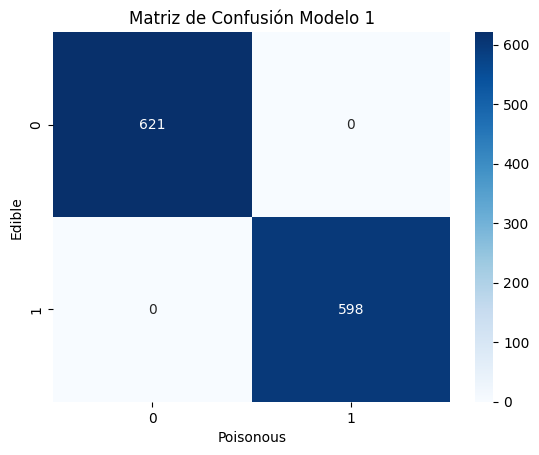

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt


# Crear un mapa de calor de la matriz de confusión utilizando Seaborn
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')

# Configurar las etiquetas de los ejes
plt.xlabel('Poisonous')
plt.ylabel('Edible')

# Mostrar el título
plt.title('Matriz de Confusión Modelo 1')

# Mostrar la gráfica
plt.show()


#### Modelo 2.

In [134]:
# Obtener las predicciones en el conjunto de prueba
# Crear el modelo
model = Sequential()

# Agregar la primera capa oculta
model.add(Dense(64, activation='relu', input_shape=(40,)))

# Agregar la segunda capa oculta
model.add(Dense(32, activation='relu'))

# Agregar la capa de salida
model.add(Dense(2, activation='softmax'))

# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])# Crear el modelo
# model = Sequential()

# # Agregar la primera capa oculta
# model.add(Dense(64, activation='relu', input_shape=(40,)))

# # Agregar la segunda capa oculta
# model.add(Dense(32, activation='relu'))

# # Agregar la capa de salida
# model.add(Dense(2, activation='softmax'))

# # Compilar el modelo
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


from sklearn.metrics import confusion_matrix

# Entrenar el modelo con los conjuntos de entrenamiento y validación seleccionados
model.fit(X_train_selected, y_train, validation_data=(X_val_selected, y_val), epochs=10, batch_size=32)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test_selected)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(np.array(y_test), axis=1)

# Calcular la matriz de confusión
confusion_matrix = confusion_matrix(y_test_classes, y_pred_classes)

# # Mostrar la matriz de confusión
# print("Matriz de confusión:")
# print(confusion_matrix)


Epoch 1/10
178/178 [==============================] - 1s 3ms/step - loss: 0.1581 - accuracy: 0.9557 - val_loss: 0.0368 - val_accuracy: 0.9893
Epoch 2/10
178/178 [==============================] - 0s 2ms/step - loss: 0.0170 - accuracy: 0.9961 - val_loss: 0.0074 - val_accuracy: 0.9992
Epoch 3/10
178/178 [==============================] - 0s 2ms/step - loss: 0.0046 - accuracy: 0.9991 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 4/10
178/178 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 5/10
178/178 [==============================] - 0s 2ms/step - loss: 7.3071e-04 - accuracy: 1.0000 - val_loss: 4.8332e-04 - val_accuracy: 1.0000
Epoch 6/10
178/178 [==============================] - 0s 2ms/step - loss: 3.5648e-04 - accuracy: 1.0000 - val_loss: 2.5401e-04 - val_accuracy: 1.0000
Epoch 7/10
178/178 [==============================] - 0s 2ms/step - loss: 2.0039e-04 - accuracy: 1.0000 - val_loss: 1.5461e-04 - val

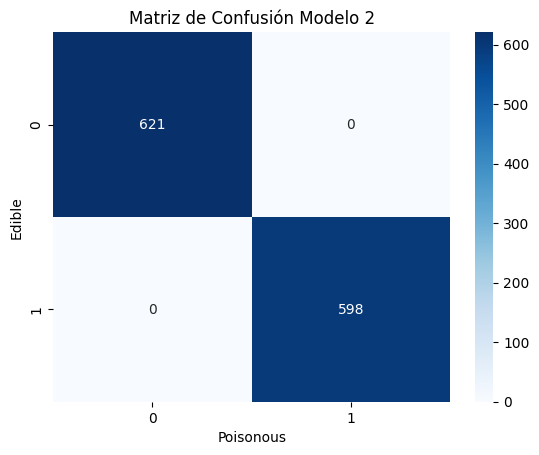

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt


# Crear un mapa de calor de la matriz de confusión utilizando Seaborn
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')

# Configurar las etiquetas de los ejes
plt.xlabel('Poisonous')
plt.ylabel('Edible')

# Mostrar el título
plt.title('Matriz de Confusión Modelo 2')

# Mostrar la gráfica
plt.show()
